# Sentiment Analysis
3. What are the cafe rankings based on sentiment?
4. How does a cafe get a better or worse sentiment?
5. Are people honest with their ratings?

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
reviews_df = pd.read_excel("../2. Data Pre-processing/kl_selangor_cafe_reviews.xlsx")
reviews_df.head(5)

,rating,cafe_name,number_of_images,estimated_date,description_processed
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...


In [3]:
import pandas as pd
import json
with open('../1. Data Collection/results.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df

from pandas import json_normalize

# Initialize an empty list to store the normalized DataFrames
normalized_dfs = []

# Loop through each cafe
for cafe_name, cafe_data in df.items():
    # Normalize the 'most_relevant' column for the current cafe
    normalized_df = json_normalize(cafe_data["most_relevant"])
    # Add a column for the cafe name
    normalized_df["cafe_name"] = cafe_name
    # Append the normalized DataFrame to the list
    normalized_dfs.append(normalized_df)

# Concatenate all the normalized DataFrames into a single DataFrame
df = pd.concat(normalized_dfs, ignore_index=True)

sia = SentimentIntensityAnalyzer()
#transfer unprocessed description
reviews_df["description_unprocessed"]=df["description"]
#create a new column called polarity and apply the sia method to the clean_lyric column with a lambda expression
reviews_df['polarity'] = reviews_df['description_unprocessed'].apply(lambda x: sia.polarity_scores(x))
#run this cell to transform the polarity dictionary into columns of the DataFrame
reviews_df[['neg', 'neu', 'pos', 'compound']] = reviews_df['polarity'].apply(pd.Series)

#then drop the old polarity column
reviews_df = reviews_df.drop('polarity', axis=1)

reviews_df.head(5)

,rating,cafe_name,number_of_images,estimated_date,description_processed,description_unprocessed,neg,neu,pos,compound
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...,Nice quite friendly cafe. Food is like a homel...,0.036,0.645,0.319,0.9441
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...,"Nice, quiet place for some coffee and cake aft...",0.029,0.779,0.192,0.9294
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...,"A rare simple cosy cafe that open till 12am, c...",0.000,0.843,0.157,0.7964
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...,"A kind-hearted Cafe owner, a lot of street aba...",0.042,0.728,0.230,0.9245
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...,Cosy environment a lot of quality books are fr...,0.000,0.614,0.386,0.9337


In [4]:
#run this cell to add a package from NLTK for our sentiment analyzer.
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
#run this cell to see how the sentiment analyzer works
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("I loved the pasta so much! Will definitely come again.")

{'neg': 0.0, 'neu': 0.495, 'pos': 0.505, 'compound': 0.7995}

In [6]:
sia.polarity_scores("The food was terrible! How can they serve us such a thing?")

{'neg': 0.253, 'neu': 0.747, 'pos': 0.0, 'compound': -0.5255}

In [7]:
#create a new column called polarity and apply the sia method to the clean_lyric column with a lambda expression
reviews_df['polarity'] = reviews_df['description_unprocessed'].apply(lambda x: sia.polarity_scores(x))
reviews_df.head(5)

,rating,cafe_name,number_of_images,estimated_date,description_processed,description_unprocessed,neg,neu,pos,compound,polarity
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...,Nice quite friendly cafe. Food is like a homel...,0.036,0.645,0.319,0.9441,"{'neg': 0.036, 'neu': 0.645, 'pos': 0.319, 'co..."
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...,"Nice, quiet place for some coffee and cake aft...",0.029,0.779,0.192,0.9294,"{'neg': 0.029, 'neu': 0.779, 'pos': 0.192, 'co..."
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...,"A rare simple cosy cafe that open till 12am, c...",0.000,0.843,0.157,0.7964,"{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp..."
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...,"A kind-hearted Cafe owner, a lot of street aba...",0.042,0.728,0.230,0.9245,"{'neg': 0.042, 'neu': 0.728, 'pos': 0.23, 'com..."
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...,Cosy environment a lot of quality books are fr...,0.000,0.614,0.386,0.9337,"{'neg': 0.0, 'neu': 0.614, 'pos': 0.386, 'comp..."


In [8]:
#run this cell to transform the polarity dictionary into columns of the DataFrame
reviews_df[['neg', 'neu', 'pos', 'compound']] = reviews_df['polarity'].apply(pd.Series)

#then drop the old polarity column
reviews_df = reviews_df.drop('polarity', axis=1)

reviews_df

,rating,cafe_name,number_of_images,estimated_date,description_processed,description_unprocessed,neg,neu,pos,compound
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...,Nice quite friendly cafe. Food is like a homel...,0.036,0.645,0.319,0.9441
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...,"Nice, quiet place for some coffee and cake aft...",0.029,0.779,0.192,0.9294
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...,"A rare simple cosy cafe that open till 12am, c...",0.000,0.843,0.157,0.7964
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...,"A kind-hearted Cafe owner, a lot of street aba...",0.042,0.728,0.230,0.9245
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...,Cosy environment a lot of quality books are fr...,0.000,0.614,0.386,0.9337
...,...,...,...,...,...,...,...,...,...,...
675,4,半刻 Ban Ke Cafe @ Happy Mansion,3,2024-05-08,small cafe tucked away popular section 17 happ...,Small cafe tucked away in the ever popular Sec...,0.028,0.730,0.242,0.9934
676,4,半刻 Ban Ke Cafe @ Happy Mansion,6,2024-02-08,love place especially upstairs little kitchen ...,We love this place! Especially the upstairs li...,0.000,0.670,0.330,0.9060
677,5,半刻 Ban Ke Cafe @ Happy Mansion,3,2024-01-08,saw cafe xhs decided try overall good didnt re...,Saw this cafe from XHS and decided to give it ...,0.040,0.650,0.309,0.9558
678,4,半刻 Ban Ke Cafe @ Happy Mansion,1,2024-04-08,time nice ambience friendly staffs fantastic f...,"First time here, nice ambience, friendly staff...",0.000,0.730,0.270,0.9665


For reviews with 5 star ratings:
sum compound:  283.3935
mean compound:  0.8773792569659443

For reviews with 4 star ratings:
sum compound:  182.7193
mean compound:  0.8157111607142857

For reviews with 3 star ratings:
sum compound:  44.6819
mean compound:  0.5802844155844156

For reviews with 2 star ratings:
sum compound:  5.1266
mean compound:  0.19717692307692308

For reviews with 1 star ratings:
sum compound:  -3.9954
mean compound:  -0.13318



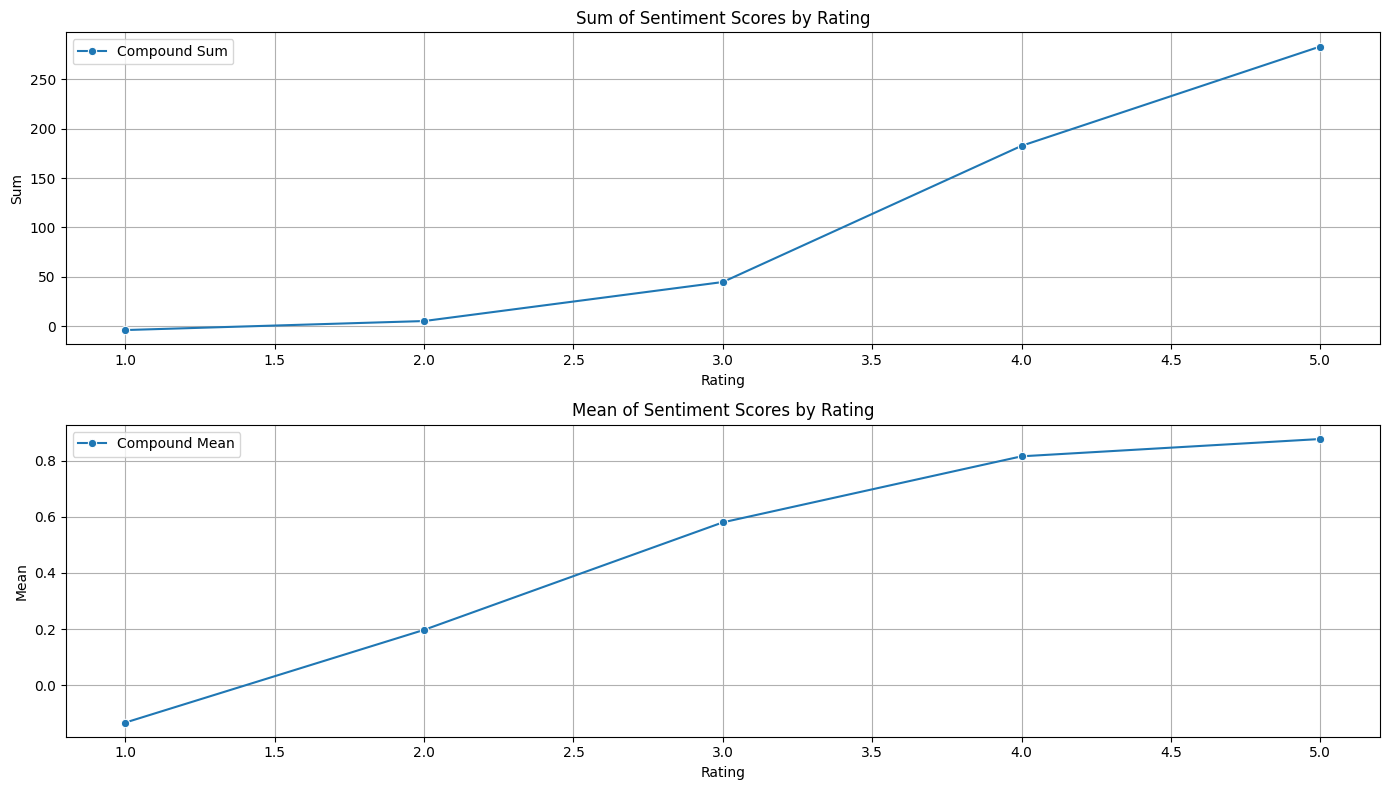

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean


# Initialize lists to store the results
ratings = []
compound_sums = []
compound_means = []

# Compute sums and means for each rating group
for i in range(5, 0, -1):
    review_group = reviews_df[reviews_df['rating'] == i].reset_index(drop=True)
    pos_sum = sum(review_group['pos'])
    neg_sum = sum(review_group['neg'])
    compound_sum = sum(review_group['compound'])
    pos_mean = mean(review_group['pos'])
    neg_mean = mean(review_group['neg'])
    compound_mean = mean(review_group['compound'])
    
    ratings.append(i)
    compound_sums.append(compound_sum)
    compound_means.append(compound_mean)
    print(f"For reviews with {i} star ratings:")
    print("sum compound: ", compound_sum)
    print("mean compound: ", compound_mean)
    print("")

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Rating': ratings,
    'Compound Sum': compound_sums,
    'Compound Mean': compound_means
})

# Plot the results
plt.figure(figsize=(14, 8))

# Plot sums
plt.subplot(2, 1, 1)
sns.lineplot(data=plot_data, x='Rating', y='Compound Sum', label='Compound Sum', marker='o')
plt.title('Sum of Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Sum')
plt.legend()
plt.grid(True)

# Plot means
plt.subplot(2, 1, 2)
sns.lineplot(data=plot_data, x='Rating', y='Compound Mean', label='Compound Mean', marker='o')
plt.title('Mean of Sentiment Scores by Rating')
plt.xlabel('Rating')
plt.ylabel('Mean')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [10]:
# Group by 'cafe_name' and perform the required aggregations
grouped_df = reviews_df.groupby('cafe_name').agg({
    # Get the number of ratings,
    'compound': 'mean',
    'rating': 'mean',
}).reset_index()
grouped_df

# Set column names
grouped_df.columns = ['cafe_name', 'compound_mean','average_rating']

grouped_df

,cafe_name,compound_mean,average_rating
0,6Yi Cafe,0.818975,4.375
1,ALLO by The Owls Cafe,0.558500,3.875
2,AMP Cafe,0.909775,4.500
3,ANT Cafe & Bar,0.575937,4.125
4,AOOO Melbourne Cafe,0.915338,4.875
...,...,...,...
80,Yeah Man @ Wanderous Sheep Cafe,0.622038,4.375
81,Yu.Mee cafe,0.566538,3.500
82,bröom Artisan Bakery & Kitchen,0.659963,3.375
83,半刻 Ban Ke Cafe @ Happy Mansion,0.943538,4.500


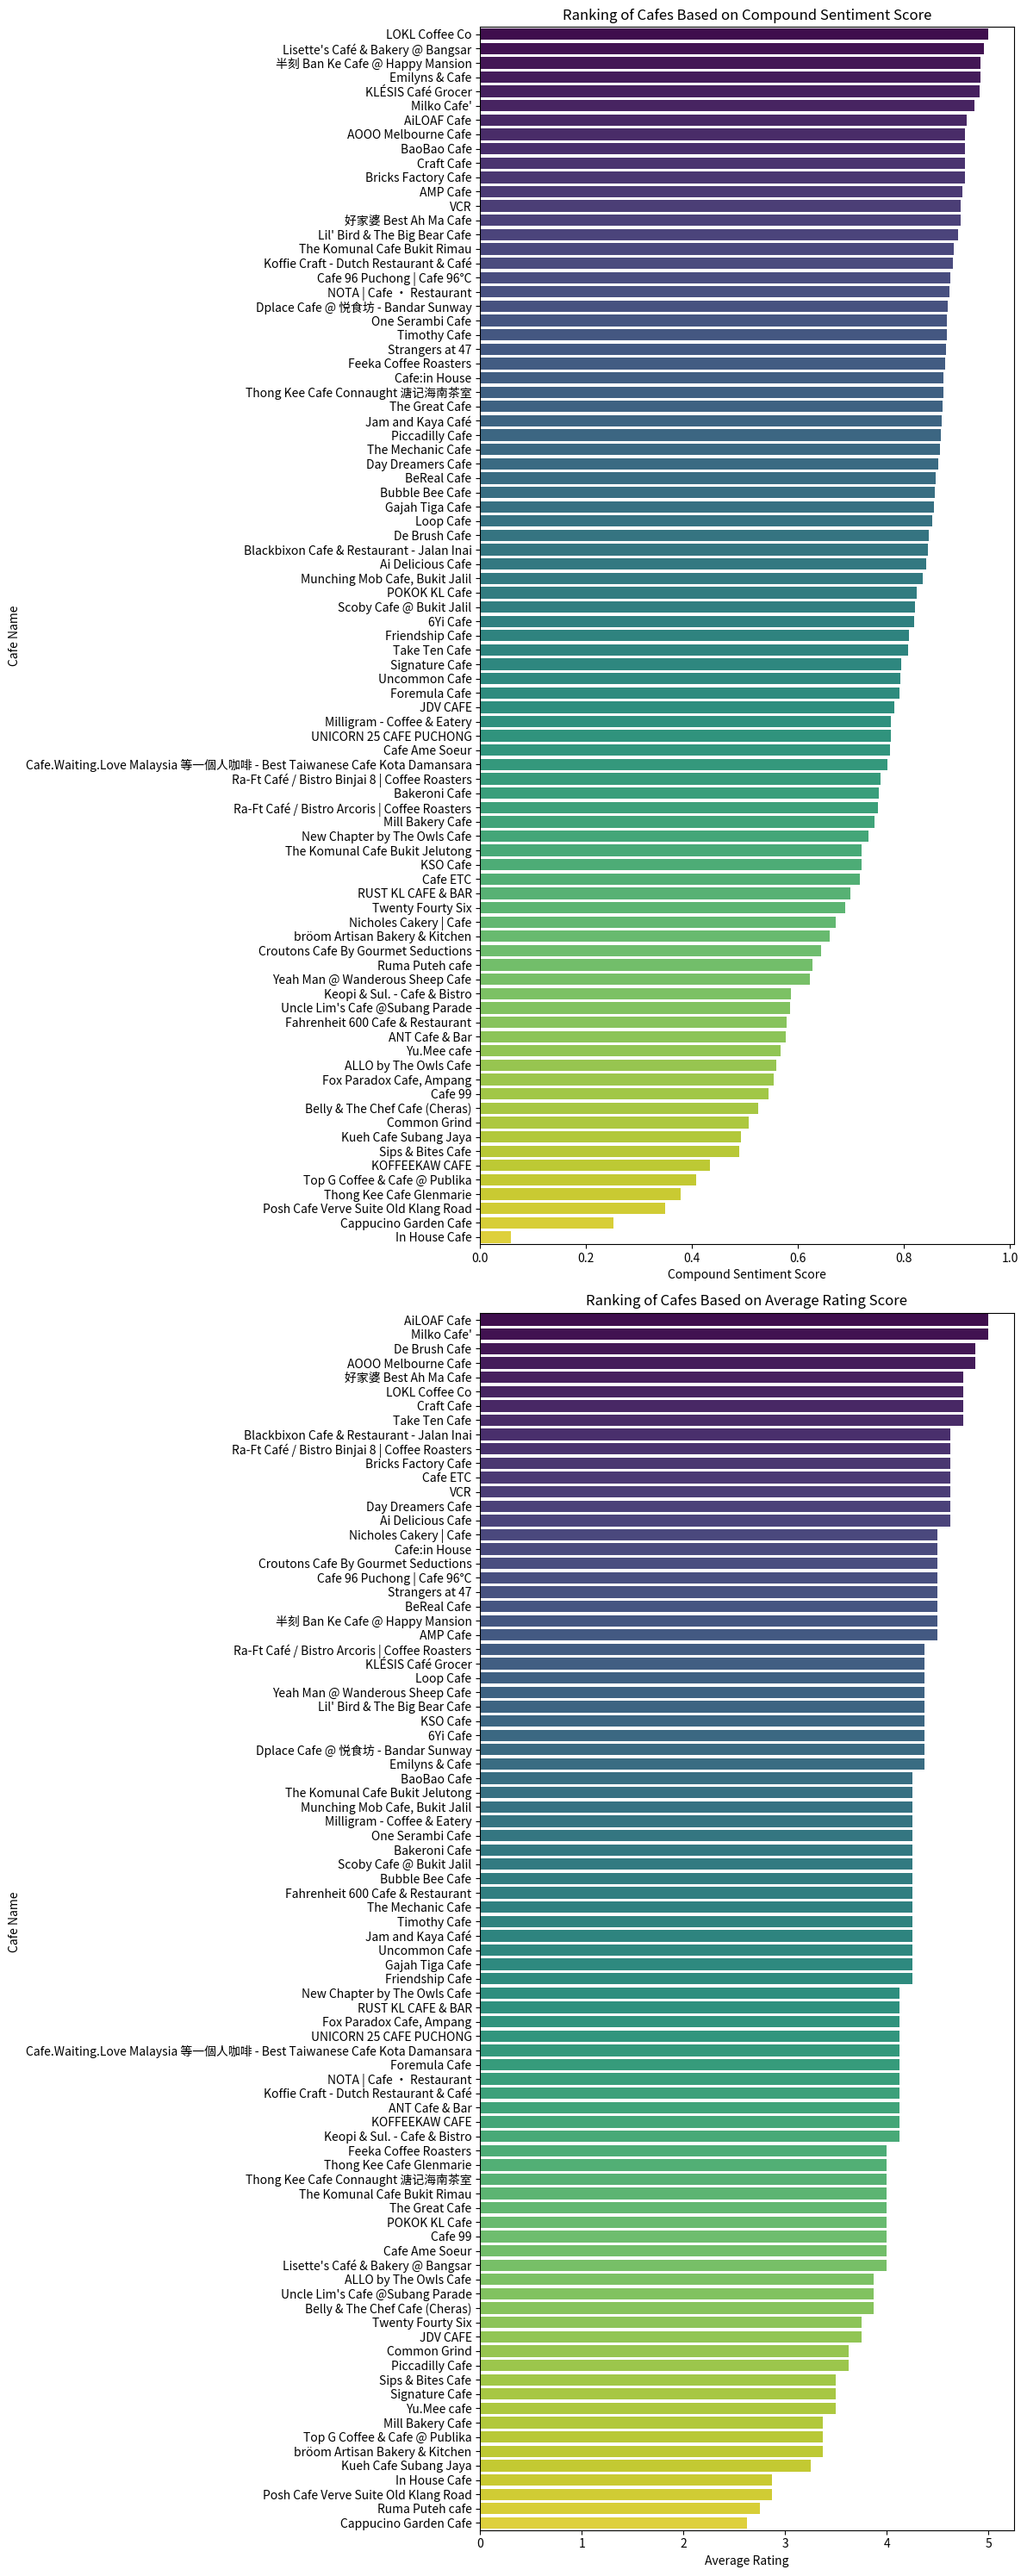

In [11]:
sort_by_compound = grouped_df.sort_values(by='compound_mean', ascending=False).reset_index(drop=True)
sort_by_rating = grouped_df.sort_values(by='average_rating', ascending=False).reset_index(drop=True)

# Set the font family to one that supports a wide range of characters such as Chinese Characters
plt.rcParams['font.family'] = 'Noto Sans SC'
# Set the size of the plot
plt.figure(figsize=(12, 30))

# Create the first subplot
plt.subplot(2, 1, 1)
sns.barplot(x='compound_mean', y='cafe_name', hue="cafe_name", data=sort_by_compound, palette='viridis', dodge=False, legend=False)
plt.title('Ranking of Cafes Based on Compound Sentiment Score')
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Cafe Name')

# Create the second subplot
plt.subplot(2, 1, 2)
sns.barplot(x='average_rating', y='cafe_name', hue="cafe_name", data=sort_by_rating, palette='viridis', dodge=False, legend=False)
plt.title('Ranking of Cafes Based on Average Rating Score')
plt.xlabel('Average Rating')
plt.ylabel('Cafe Name')

# Adjust the layout to ensure everything fits without overlap
plt.tight_layout()

# Show the plots
plt.show()

In [12]:
sort_by_compound["compound_ranking"] =  range(1,86)
sort_by_rating["rating_ranking"] =  range(1,86)

merged_df = pd.merge(sort_by_compound, sort_by_rating, on='cafe_name', how='inner')

merged_df["compound_mean"] = merged_df["compound_mean_x"]
merged_df["average_rating"] = merged_df["average_rating_x"]
merged_df = merged_df.drop(columns=["compound_mean_x","compound_mean_y","average_rating_x","average_rating_y"], axis=1)

merged_df['ranking_difference'] = (merged_df['compound_ranking'] - merged_df['rating_ranking'])

sort_by_ranking_difference = merged_df.sort_values(by='ranking_difference', ascending=False).reset_index(drop=True)
sort_by_ranking_difference

,cafe_name,compound_ranking,rating_ranking,compound_mean,average_rating,ranking_difference
0,Cafe ETC,60,12,0.716850,4.625,48
1,Croutons Cafe By Gourmet Seductions,65,18,0.643587,4.500,47
2,Nicholes Cakery | Cafe,63,16,0.671300,4.500,47
3,Ra-Ft Café / Bistro Binjai 8 | Coffee Roasters,53,10,0.756188,4.625,43
4,Yeah Man @ Wanderous Sheep Cafe,67,27,0.622038,4.375,40
...,...,...,...,...,...,...
80,The Great Cafe,27,63,0.872263,4.000,-36
81,Koffie Craft - Dutch Restaurant & Café,17,55,0.891775,4.125,-38
82,Piccadilly Cafe,29,74,0.869575,3.625,-45
83,The Komunal Cafe Bukit Rimau,16,62,0.893563,4.000,-46


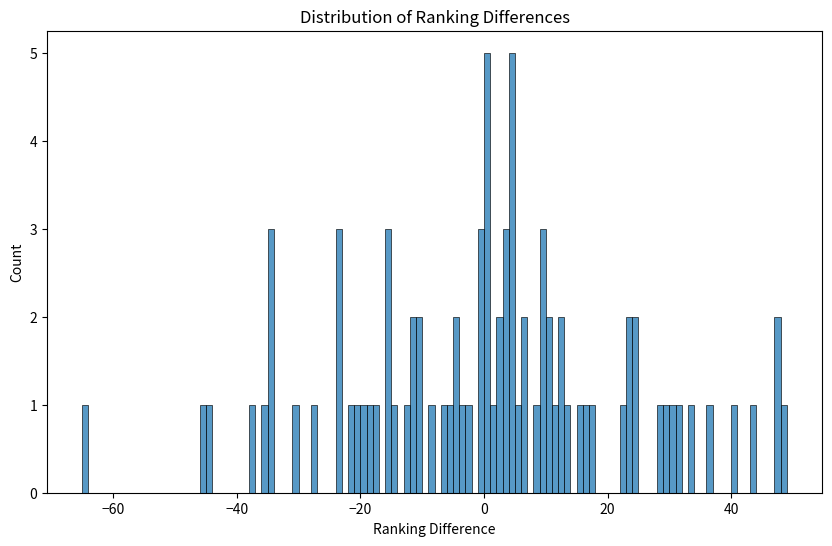

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(sort_by_ranking_difference['ranking_difference'], bins=range(min(sort_by_ranking_difference['ranking_difference']), max(sort_by_ranking_difference['ranking_difference']) + 2), kde=False)

# Add titles and labels
plt.title('Distribution of Ranking Differences')
plt.xlabel('Ranking Difference')
plt.ylabel('Count')

# Show the plot
plt.show()

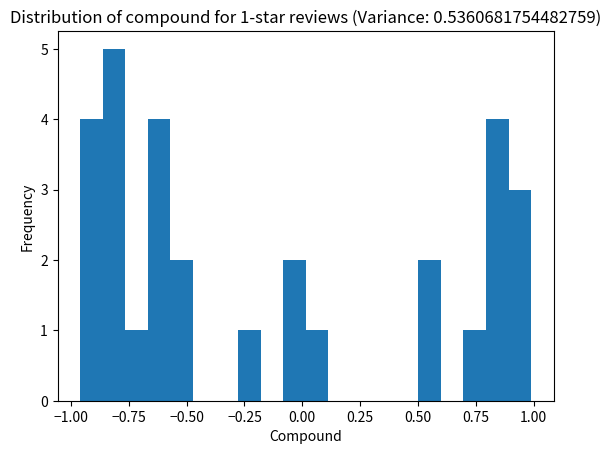

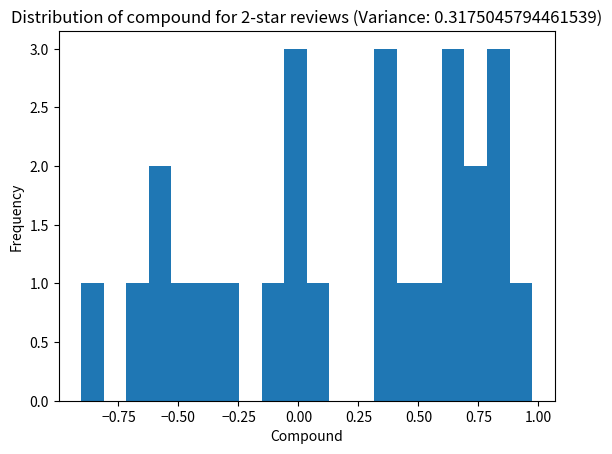

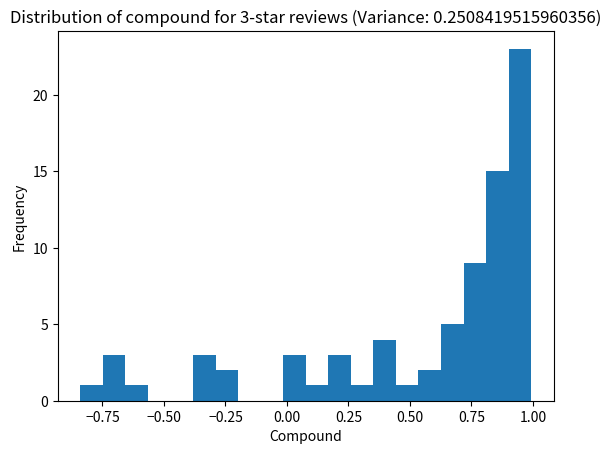

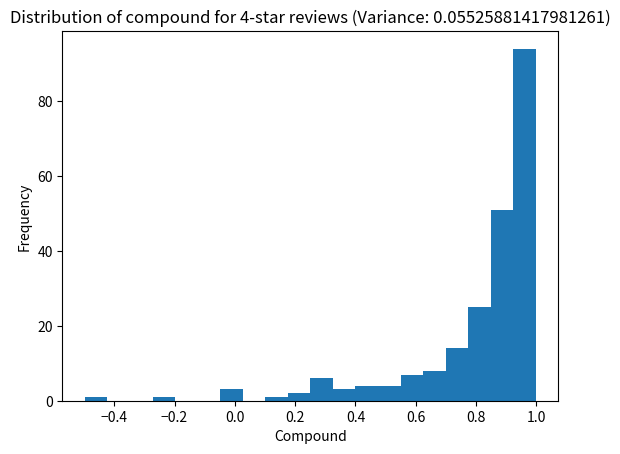

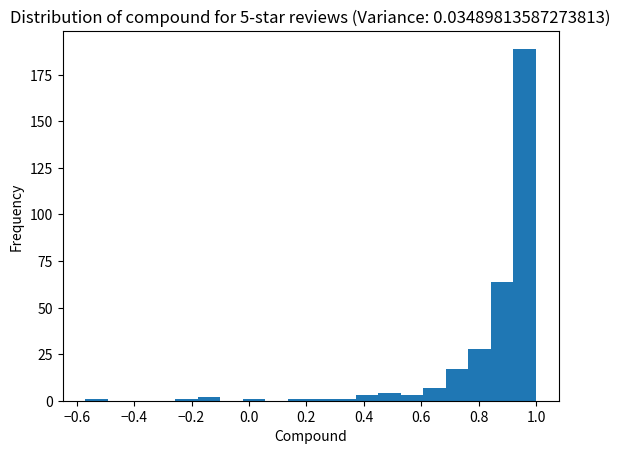

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named reviews_df with columns 'rating' and 'compound'

# Calculate variance of 'compound' for each rating
variance_by_rating = reviews_df.groupby('rating')['compound'].var()

# Visualize distribution of 'compound' for each rating
for rating, variance in variance_by_rating.items():
    plt.figure()
    reviews_df[reviews_df['rating'] == rating]['compound'].plot(kind='hist', bins=20, title=f'Distribution of compound for {rating}-star reviews (Variance: {variance})')
    plt.xlabel('Compound')
    plt.ylabel('Frequency')
    plt.show()

In [15]:
import pandas as pd
import json
with open('../1. Data Collection/results.json') as f:
    data = json.load(f)
df = pd.DataFrame(data)
df

from pandas import json_normalize

# Initialize an empty list to store the normalized DataFrames
normalized_dfs = []

# Loop through each cafe
for cafe_name, cafe_data in df.items():
    # Normalize the 'most_relevant' column for the current cafe
    normalized_df = json_normalize(cafe_data["most_relevant"])
    # Add a column for the cafe name
    normalized_df["cafe_name"] = cafe_name
    # Append the normalized DataFrame to the list
    normalized_dfs.append(normalized_df)

# Concatenate all the normalized DataFrames into a single DataFrame
df = pd.concat(normalized_dfs, ignore_index=True)

# Display the restructured DataFrame
df.head(5)

,username,rating,contributor_id,description,link,images,date,cafe_name
0,San San Lee,4,100807926156842396383,Nice quite friendly cafe. Food is like a homel...,https://www.google.com/maps/reviews/data=!4m8!...,[{'thumbnail': 'https://lh5.googleusercontent....,5 months ago,6Yi Cafe
1,Yan Lam Tong,4,101846674797744193037,"Nice, quiet place for some coffee and cake aft...",https://www.google.com/maps/reviews/data=!4m8!...,[{'thumbnail': 'https://lh5.googleusercontent....,6 months ago,6Yi Cafe
2,shuying,5,101600795081941019675,"A rare simple cosy cafe that open till 12am, c...",https://www.google.com/maps/reviews/data=!4m8!...,[{'thumbnail': 'https://lh5.googleusercontent....,6 months ago,6Yi Cafe
3,Lee Meow Onn,5,106721077042177300682,"A kind-hearted Cafe owner, a lot of street aba...",https://www.google.com/maps/reviews/data=!4m8!...,[{'thumbnail': 'https://lh5.googleusercontent....,a year ago,6Yi Cafe
4,Awas Ang,4,101928613641622488820,Cosy environment a lot of quality books are fr...,https://www.google.com/maps/reviews/data=!4m8!...,[{'thumbnail': 'https://lh5.googleusercontent....,9 months ago,6Yi Cafe


In [16]:
reviews_df["description_unprocessed"]=df["description"]
reviews_df.head(5)

,rating,cafe_name,number_of_images,estimated_date,description_processed,description_unprocessed,neg,neu,pos,compound
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...,Nice quite friendly cafe. Food is like a homel...,0.036,0.645,0.319,0.9441
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...,"Nice, quiet place for some coffee and cake aft...",0.029,0.779,0.192,0.9294
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...,"A rare simple cosy cafe that open till 12am, c...",0.000,0.843,0.157,0.7964
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...,"A kind-hearted Cafe owner, a lot of street aba...",0.042,0.728,0.230,0.9245
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...,Cosy environment a lot of quality books are fr...,0.000,0.614,0.386,0.9337


In [17]:
#create a new column called polarity and apply the sia method to the clean_lyric column with a lambda expression
reviews_df['polarity'] = reviews_df['description_unprocessed'].apply(lambda x: sia.polarity_scores(x))
#run this cell to transform the polarity dictionary into columns of the DataFrame
reviews_df[['neg_unprocessed', 'neu_unprocessed', 'pos_unprocessed', 'compound_unprocessed']] = reviews_df['polarity'].apply(pd.Series)

#then drop the old polarity column
reviews_df = reviews_df.drop('polarity', axis=1)

reviews_df.head(5)

,rating,cafe_name,number_of_images,estimated_date,description_processed,description_unprocessed,neg,neu,pos,compound,neg_unprocessed,neu_unprocessed,pos_unprocessed,compound_unprocessed
0,4,6Yi Cafe,10,2024-01-08,nice quite friendly cafe food like homely meal...,Nice quite friendly cafe. Food is like a homel...,0.036,0.645,0.319,0.9441,0.036,0.645,0.319,0.9441
1,4,6Yi Cafe,10,2023-12-08,nice quiet place coffee cake lunch design retr...,"Nice, quiet place for some coffee and cake aft...",0.029,0.779,0.192,0.9294,0.029,0.779,0.192,0.9294
2,5,6Yi Cafe,2,2023-12-08,rare simple cosy cafe open till 12am considere...,"A rare simple cosy cafe that open till 12am, c...",0.000,0.843,0.157,0.7964,0.000,0.843,0.157,0.7964
3,5,6Yi Cafe,19,2023-06-08,kindhearted cafe owner lot street abandoned an...,"A kind-hearted Cafe owner, a lot of street aba...",0.042,0.728,0.230,0.9245,0.042,0.728,0.230,0.9245
4,4,6Yi Cafe,2,2023-09-08,cosy environment lot quality books free read o...,Cosy environment a lot of quality books are fr...,0.000,0.614,0.386,0.9337,0.000,0.614,0.386,0.9337
